# Time Series with Facebook Prophet

In [1]:
import pandas as pd
import numpy as np
import datetime

from pathlib import Path

import os, sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from fbp import ProphetModel

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

## Provincial

### New cases

In [5]:
province = "Firenze"
compart = "New_cases"
date = 'Date'
group_column = 'Province'

In [6]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

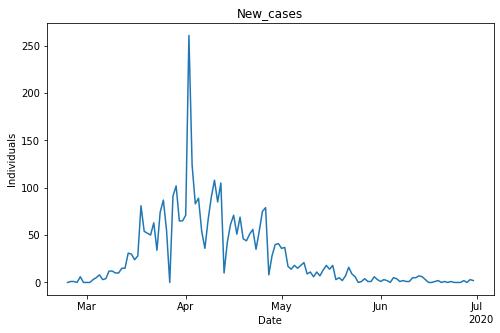

In [7]:
pm.plot_data()

In [8]:
pm.fit()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


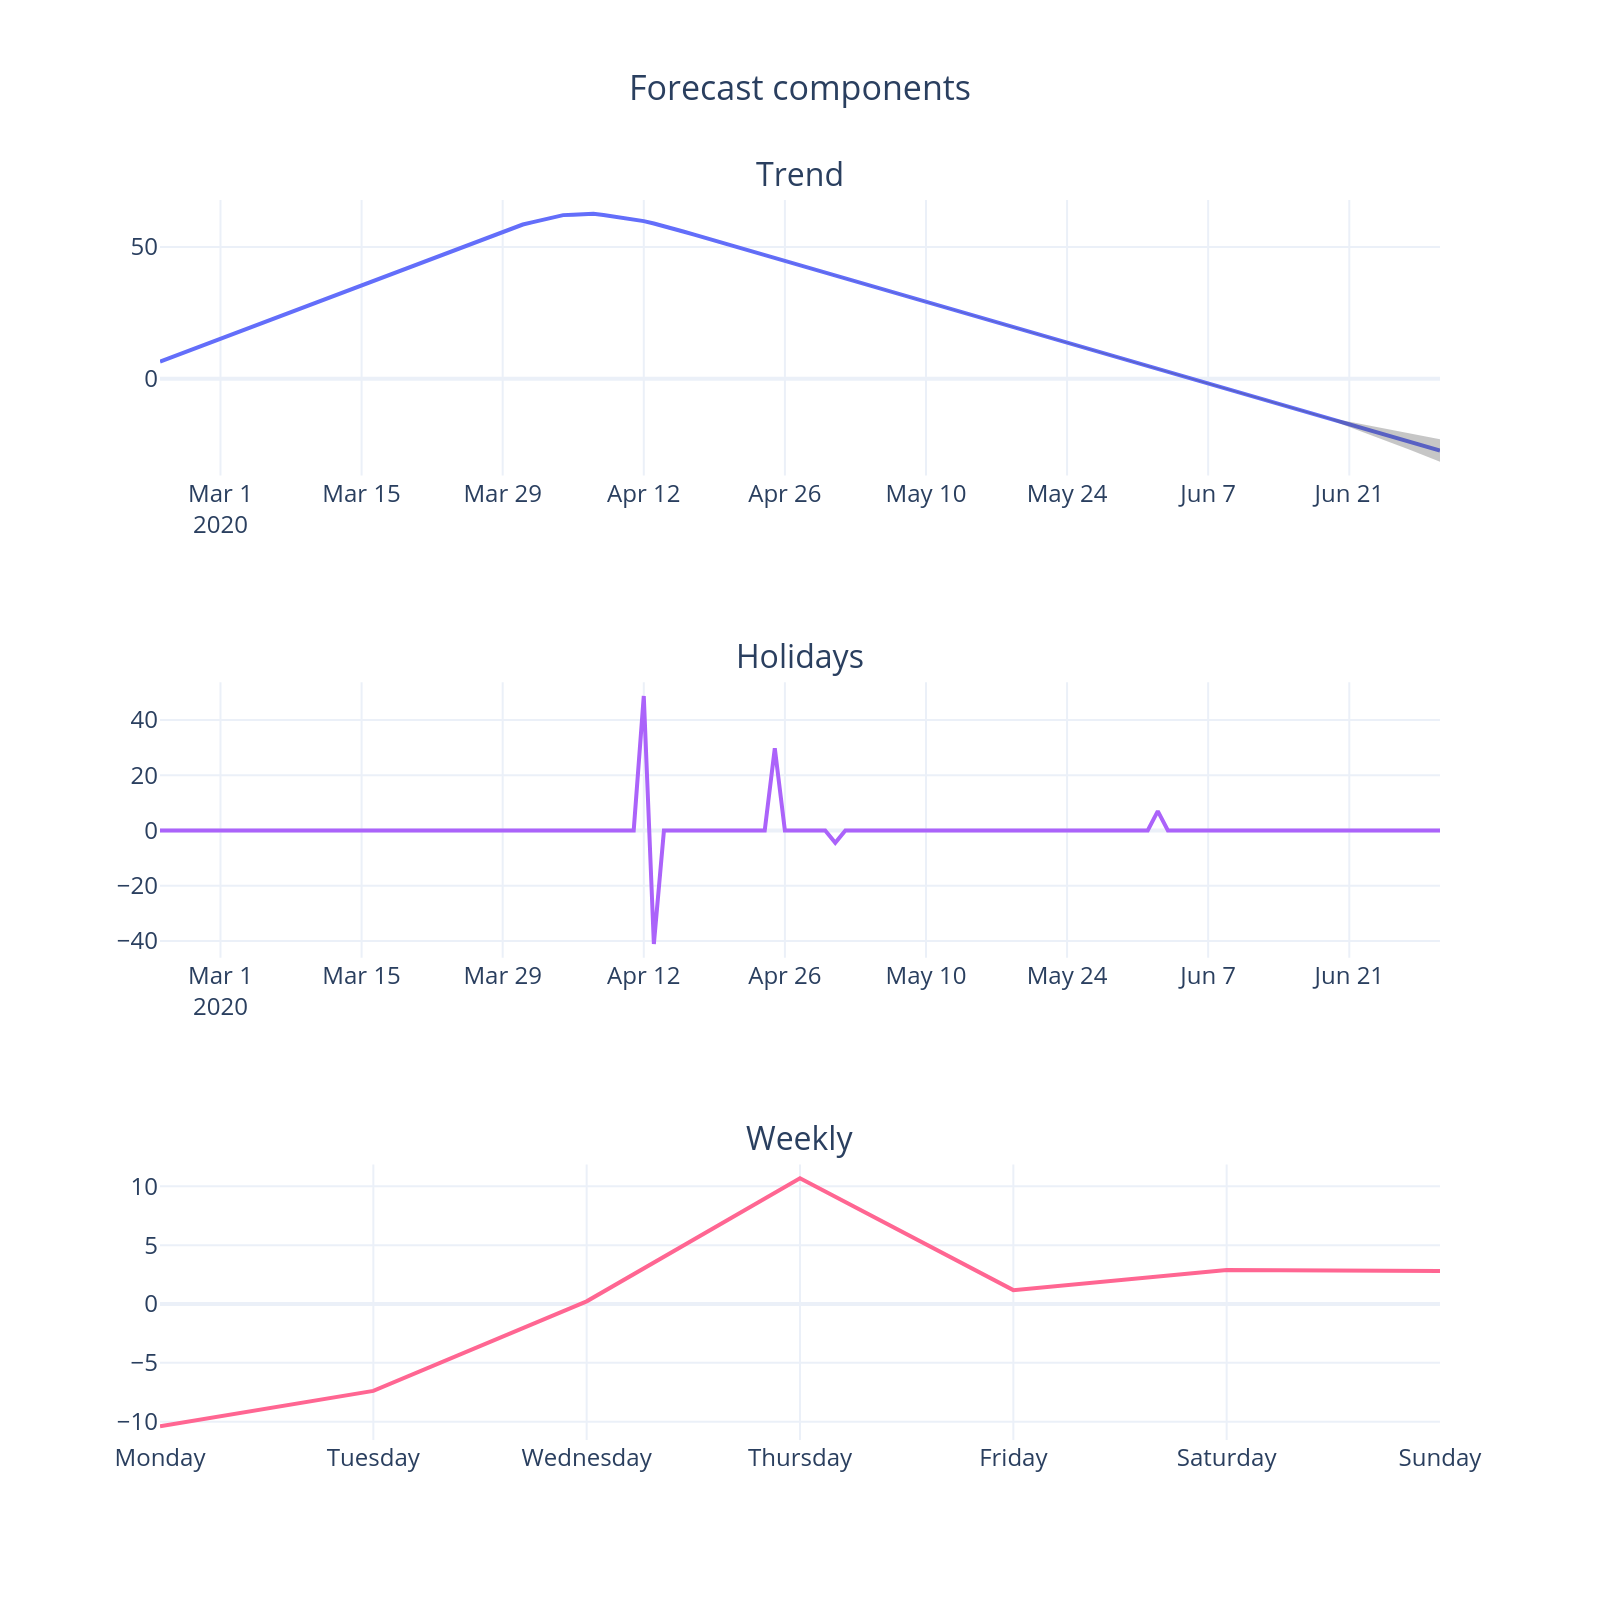

In [9]:
pm.plot_comp_plotly(output_image=True)

In [10]:
pm.print_metrics()

MAE: 15.474
MSE: 610.937
RMSE: 24.717


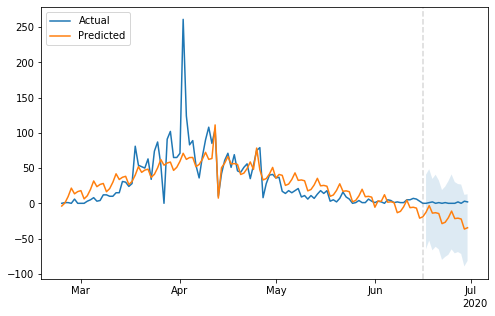

In [11]:
pm.plot()

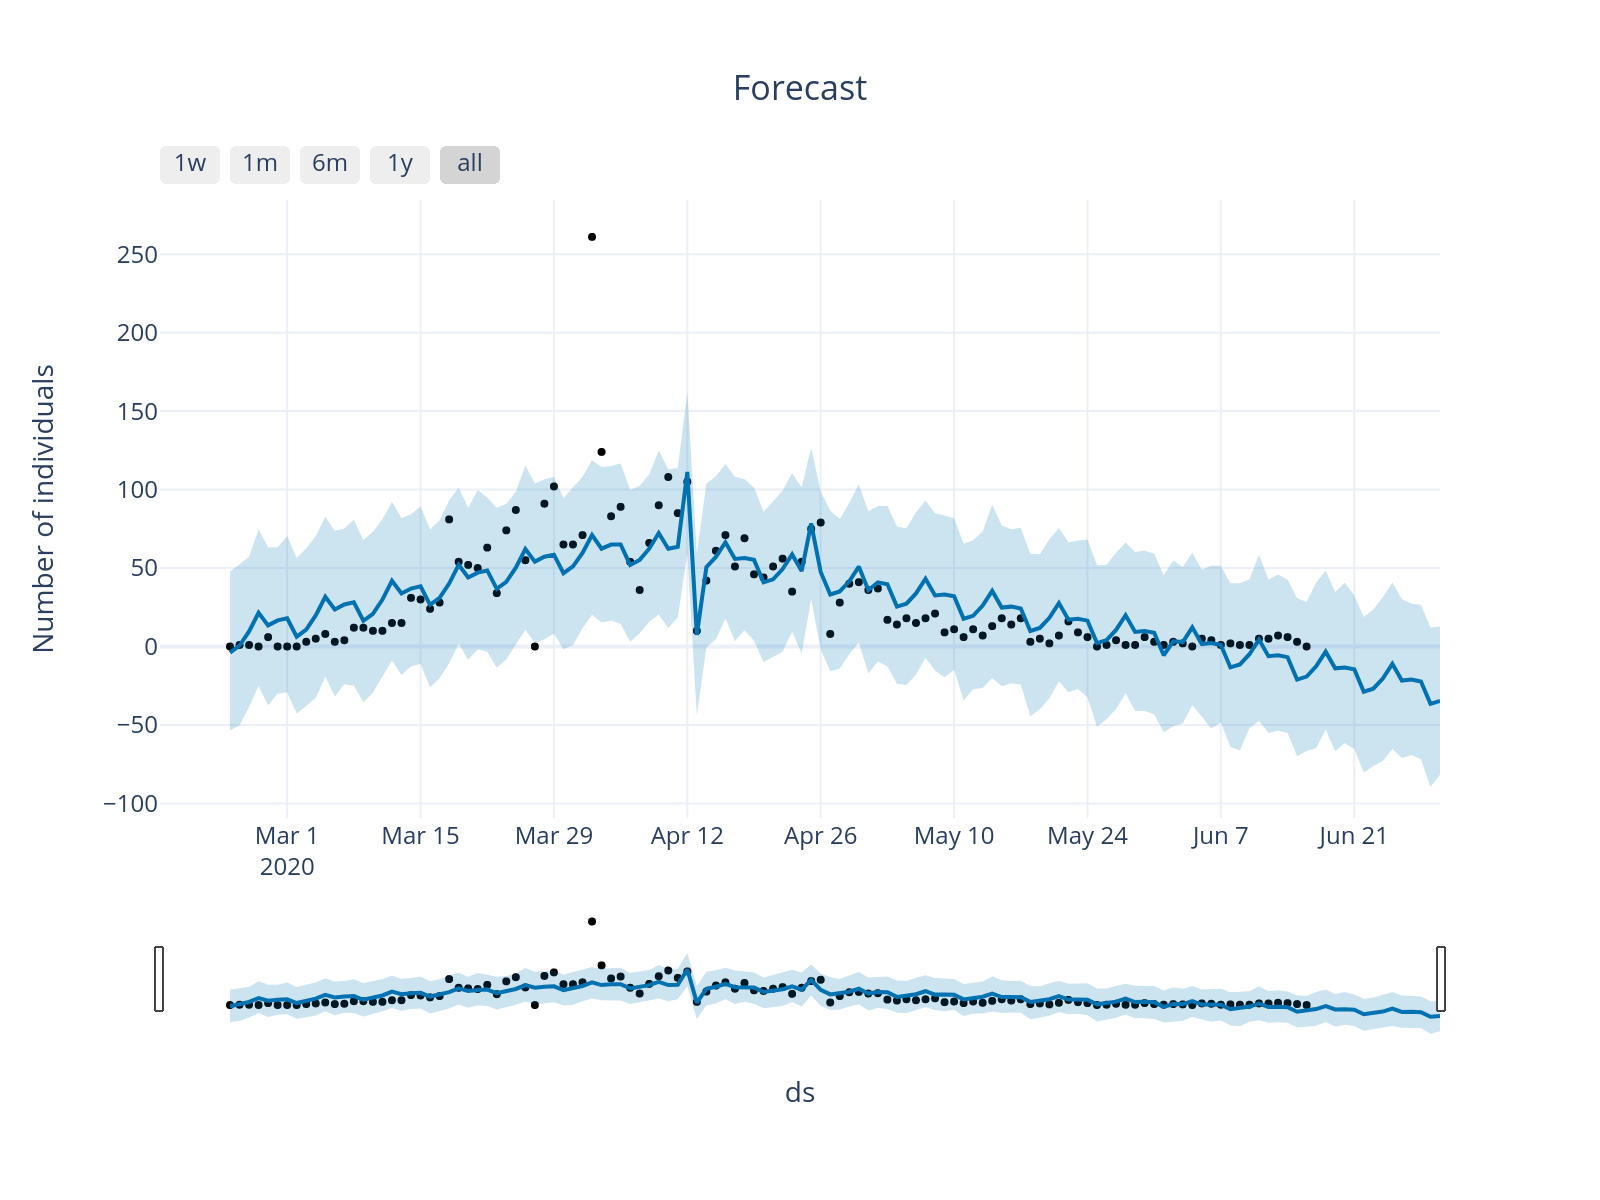

In [12]:
pm.plot_forecast(output_image=True)

In [13]:
# Tune the hyperparameters and fit
pm.fit_cv()

a0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1fed37cc40>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f20208bf9a0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:f

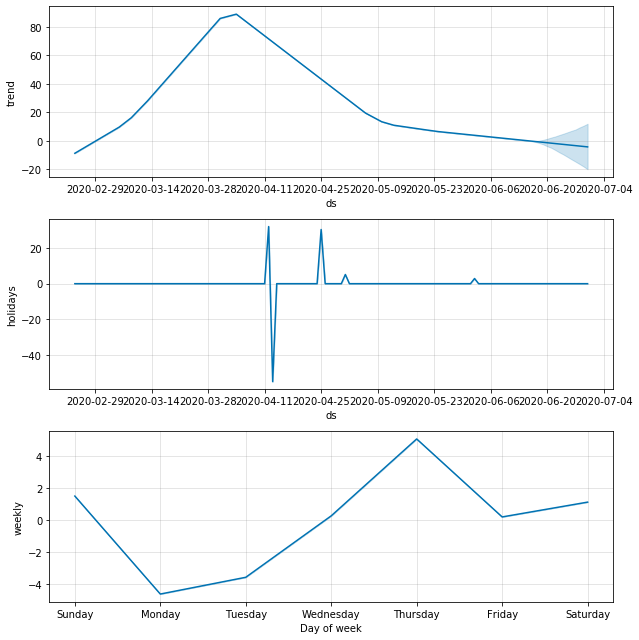

In [14]:
pm.plot_comp()

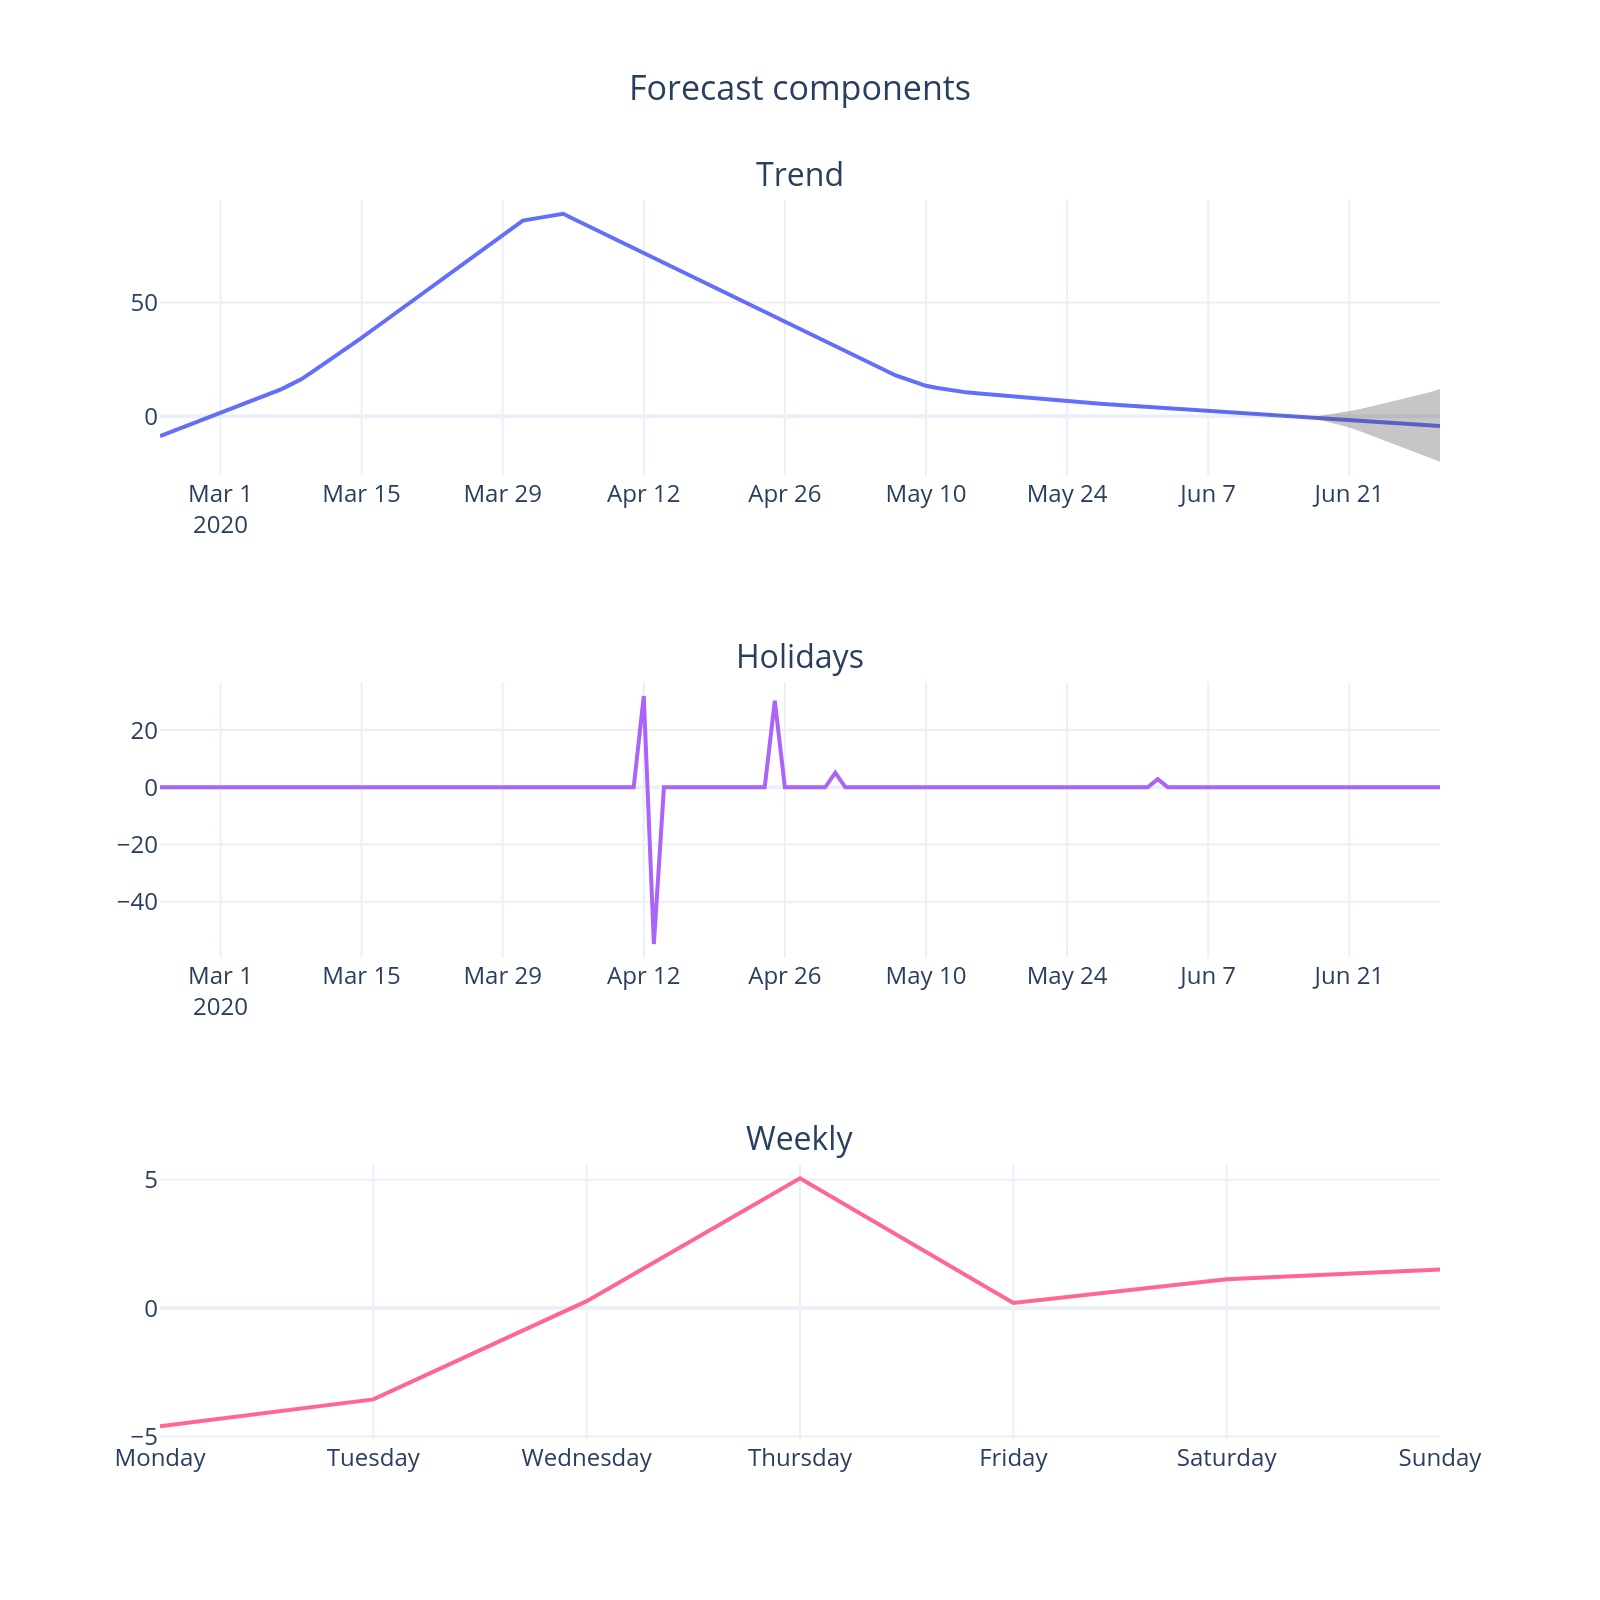

In [15]:
pm.plot_comp_plotly(output_image=True)

In [16]:
pm.print_metrics()

MAE: 9.203
MSE: 385.328
RMSE: 19.630


In [19]:
pm.tuning_results

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,rmse,mae,mse
0,0.001,0.01,0.01,27.650460,23.548298,764.547926
1,0.001,0.01,0.10,26.239607,22.230239,688.516967
2,0.001,0.01,1.00,25.835722,22.695496,667.484534
3,0.001,0.01,10.00,25.460709,22.206623,648.247706
4,0.001,0.10,0.01,28.154695,24.091847,792.686833
...,...,...,...,...,...,...
59,0.500,1.00,10.00,14.937399,11.747133,223.125875
60,0.500,10.00,0.01,14.486510,11.023279,209.858964
61,0.500,10.00,0.10,13.530629,10.472022,183.077933
62,0.500,10.00,1.00,13.966635,10.966807,195.066893


In [23]:
pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,rmse,mae,mse
51,0.5,0.01,10.0,12.721718,10.376425,161.842108


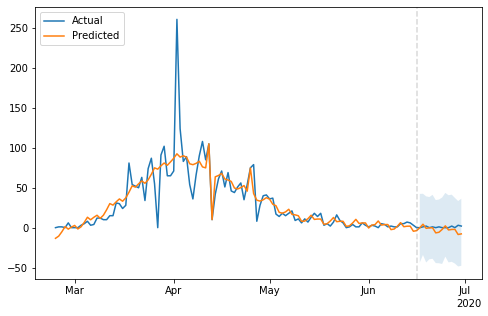

In [17]:
pm.plot()

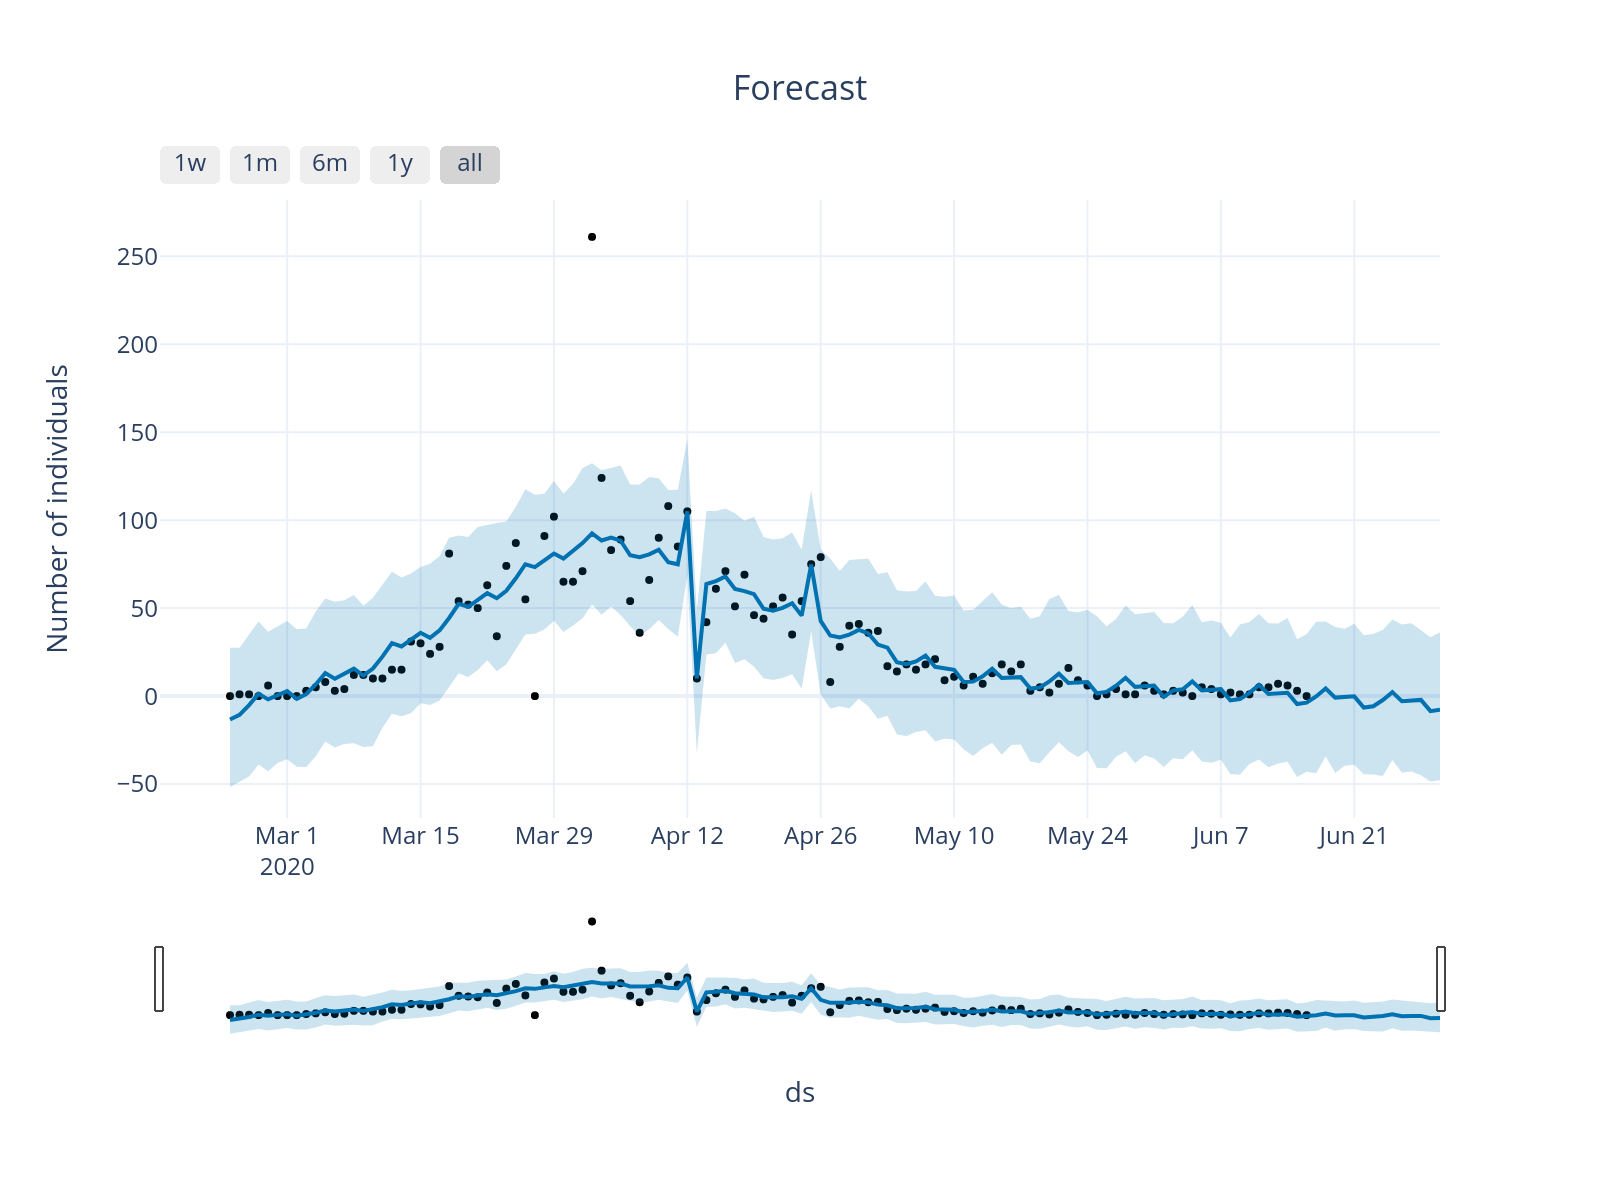

In [18]:
pm.plot_forecast(output_image=True)

### Deaths

In [27]:
province = "Firenze"
compart = "Deaths"
date = 'Date'
group_column = 'Province'

In [28]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

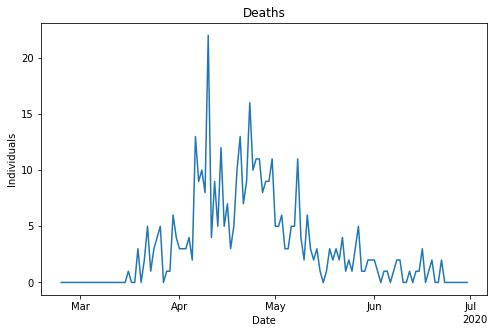

In [29]:
pm.plot_data()

In [30]:
pm.fit_cv()

30>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1fdd055bb0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f202106e3d0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:f

In [31]:
pm.tuning_results

pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,rmse,mae,mse
33,0.1,0.01,0.1,1.594425,1.318595,2.542191


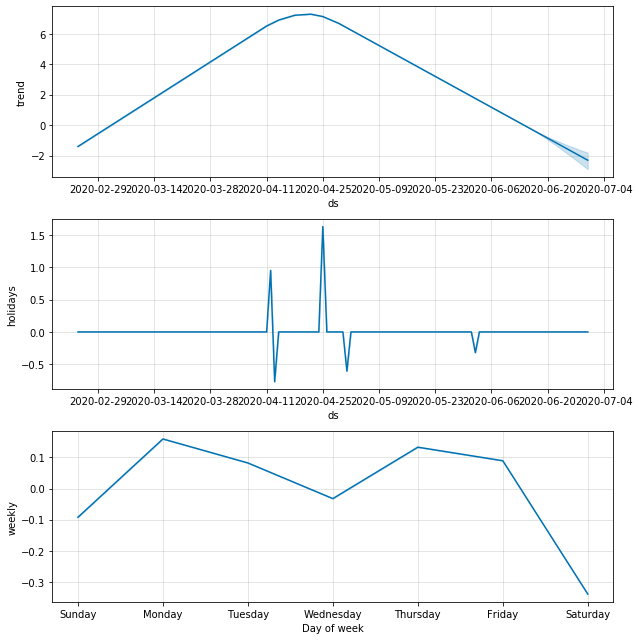

In [32]:
pm.plot_comp()

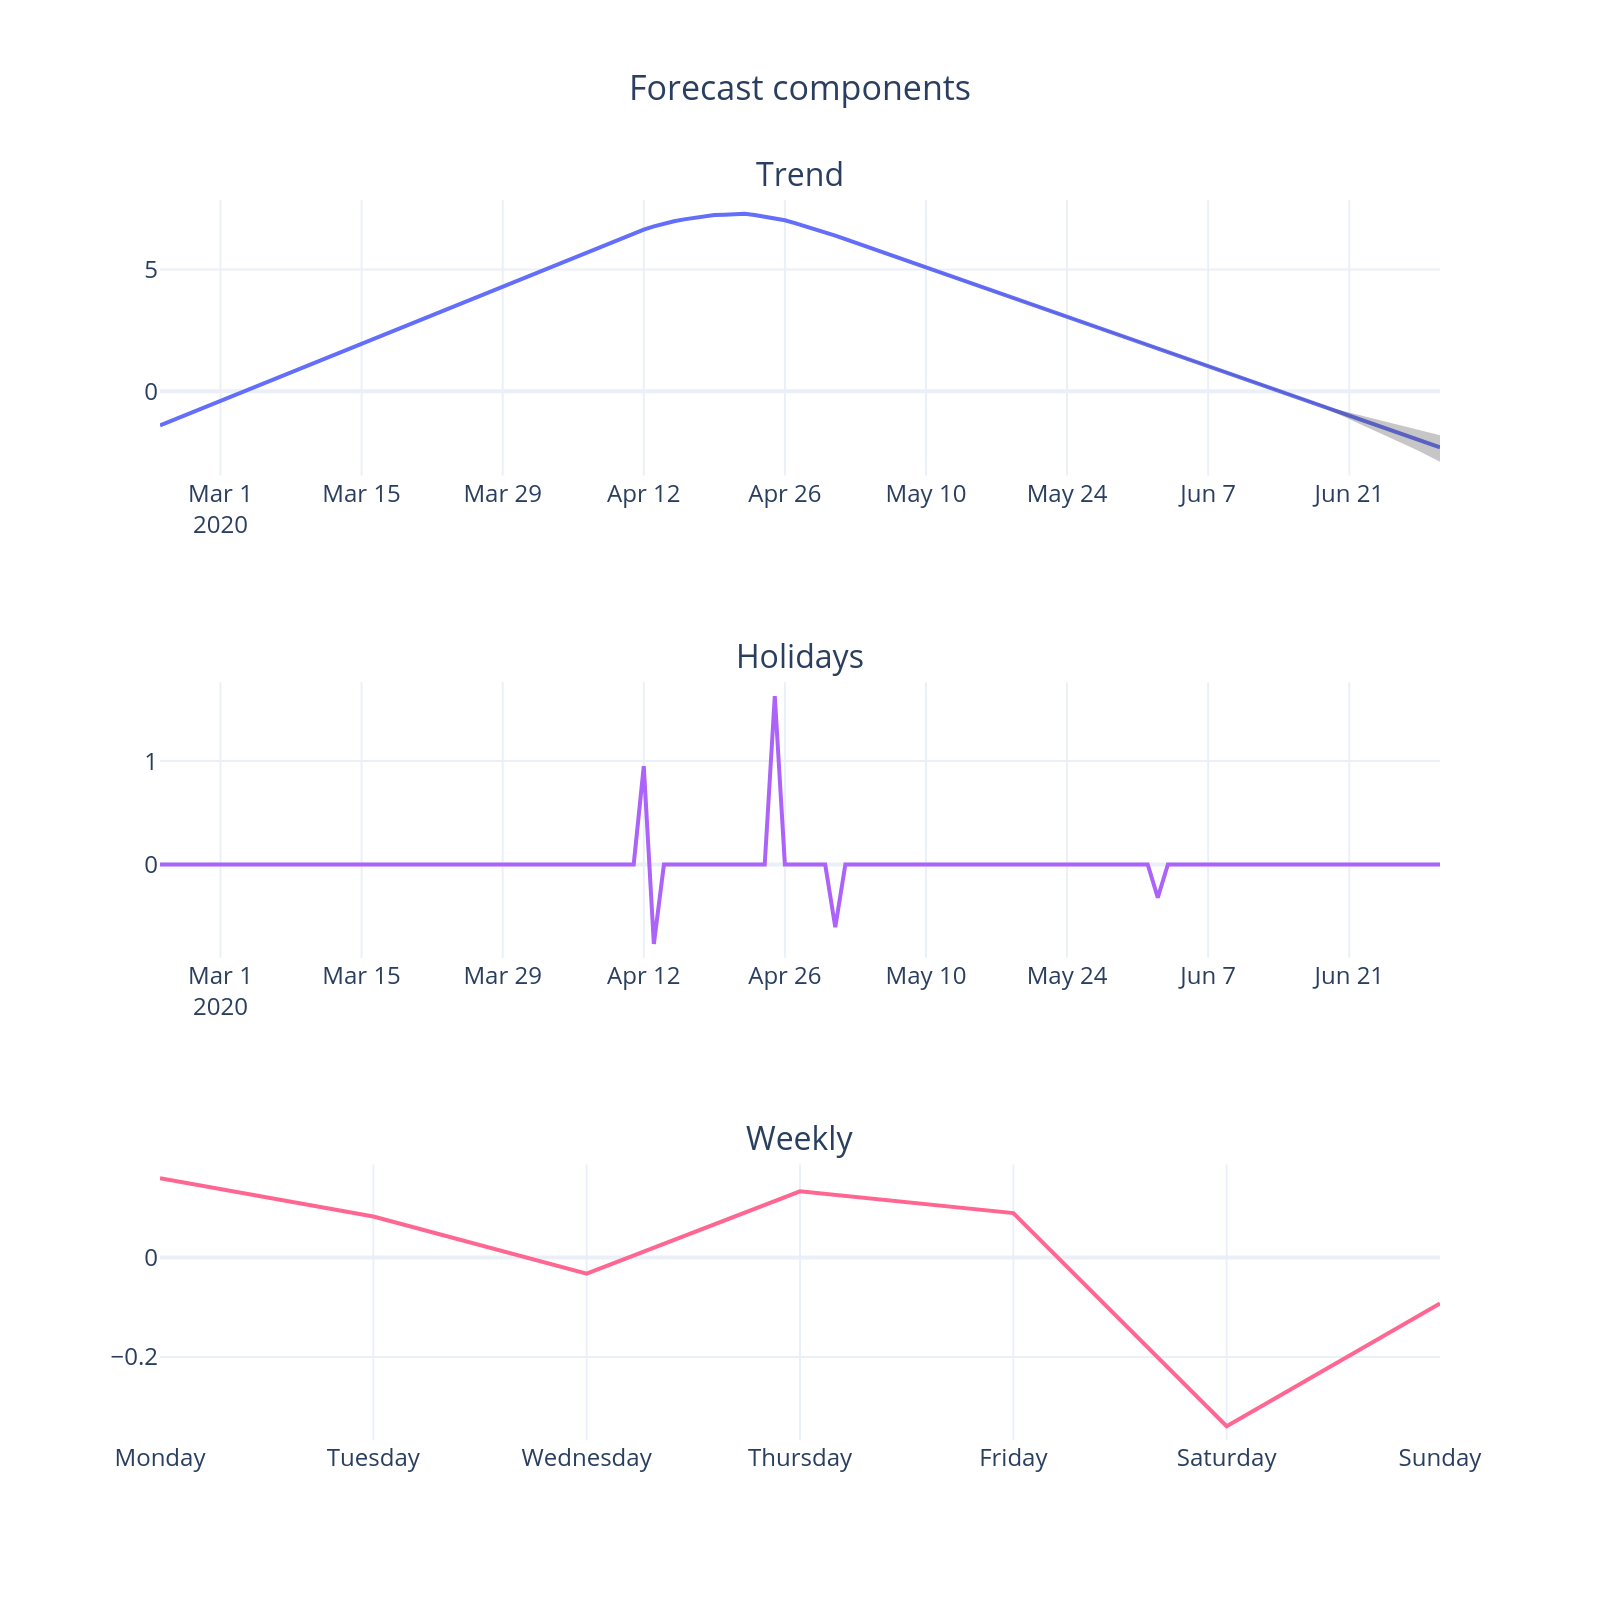

In [37]:
pm.plot_comp_plotly(output_image=True)

In [34]:
pm.print_metrics()

MAE: 1.838
MSE: 6.892
RMSE: 2.625


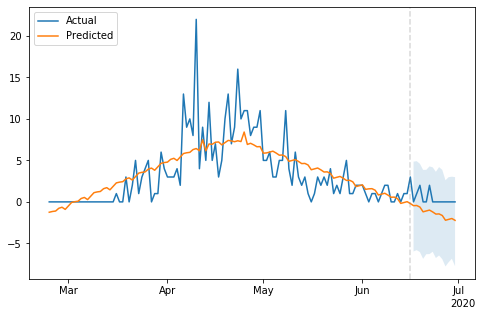

In [35]:
pm.plot()

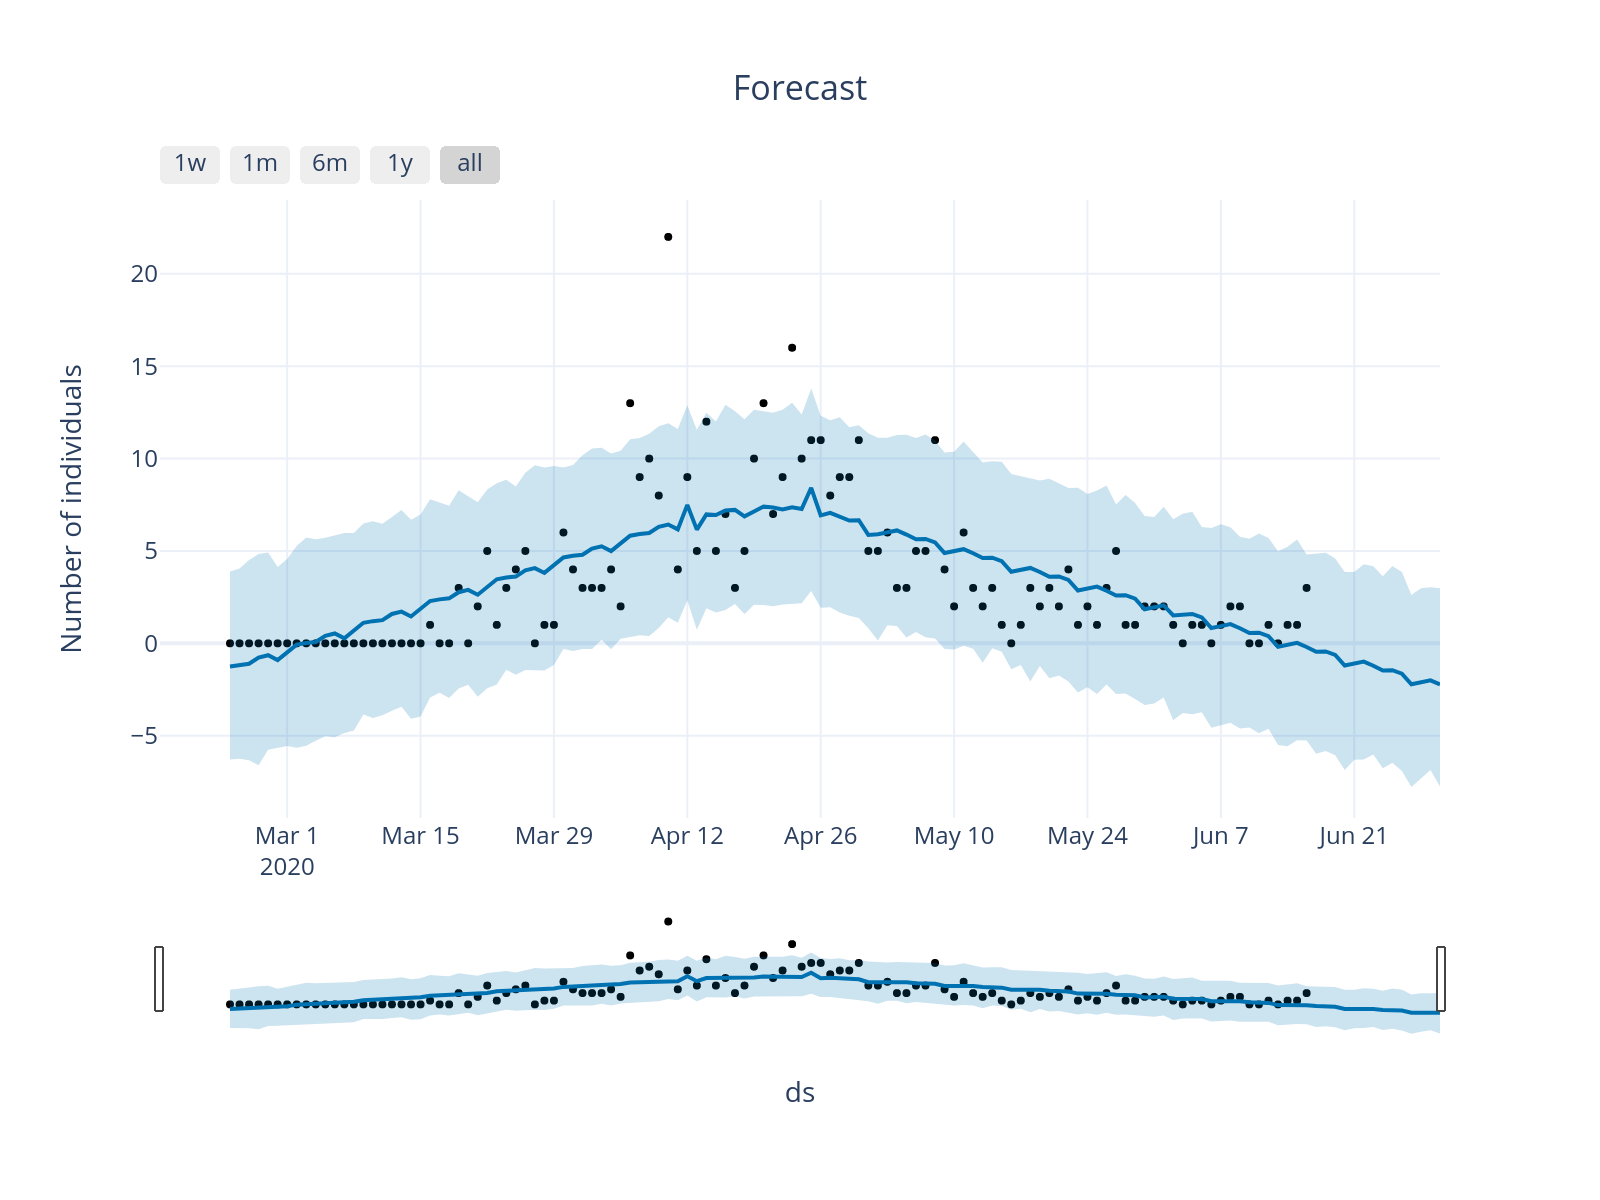

In [36]:
pm.plot_forecast(output_image=True)

### All provinces
New cases

In [20]:
import logging

In [28]:
logging.getLogger().setLevel(logging.CRITICAL)

In [ ]:
compart = "New_cases"
date = 'Date'
group_column = 'Province'

In [ ]:
results = []
for province in covidpro_df.Province.unique():
    pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

    pm.fit_cv()

    results.append([province, pm.mae(), pm.mse(), pm.rmse()])

In [ ]:
prov_res = pd.DataFrame(results, columns=['province', 'mae', 'mse', 'rmse'])
prov_res

In [ ]:
prov_res.to_csv("../results/fbp_province.csv", index=False)

### Regional
Total positives

In [ ]:
compart = "nuovi_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [ ]:
results_reg = []
for reg in dpc_regioni_df.denominazione_regione.unique():
    pm = ProphetModel(
        data=dpc_regioni_df, 
        area=reg, 
        compart=compart, 
        group_column=group_column,
        date_column=date,
        query='20200701 > data')

    pm.fit_cv()

    results_reg.append([province, pm.mae(), pm.mse(), pm.rmse()])

In [ ]:
prov_reg = pd.DataFrame(results_reg, columns=['region', 'mae', 'mse', 'rmse'])
prov_reg

In [ ]:
prov_reg.to_csv("../results/fbp_region.csv", index=False)

In [ ]:
logging.getLogger().setLevel(logging.INFO)

## Regional

### New cases

In [59]:
province = "Lombardia"
compart = "nuovi_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [60]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data')

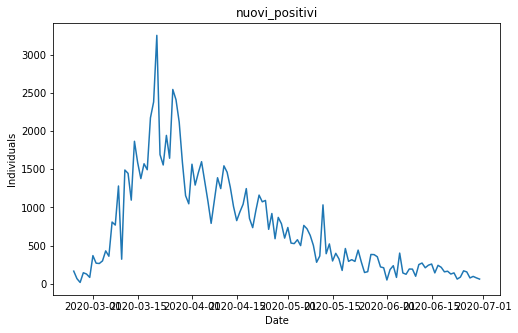

In [61]:
pm.plot_data()

In [62]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5bd02f32b0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5bd02f1b80>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

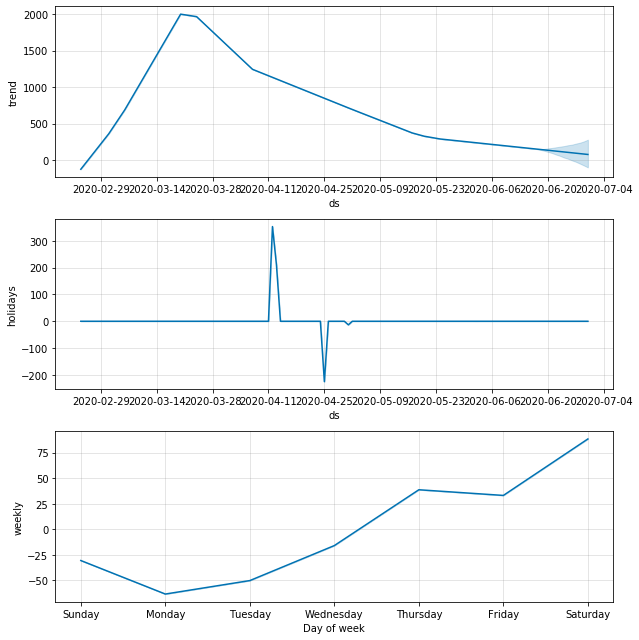

In [63]:
pm.plot_comp()

In [64]:
pm.print_metrics()

MAE: 147.178
MSE: 48905.646
RMSE: 221.146


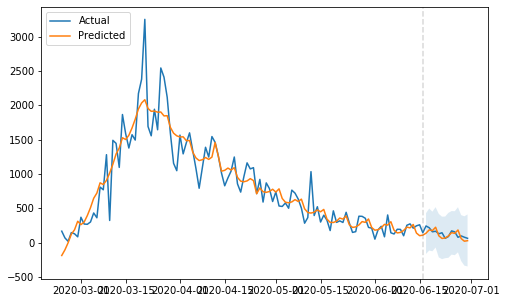

In [65]:
pm.plot()

### Total positives

In [85]:
province = "Lombardia"
compart = "totale_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [86]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data')

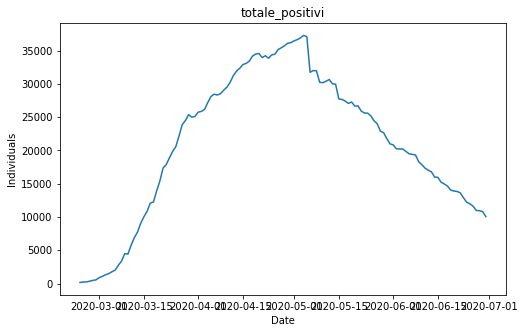

In [87]:
pm.plot_data()

In [88]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8ca8ae80>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8cb9f610>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

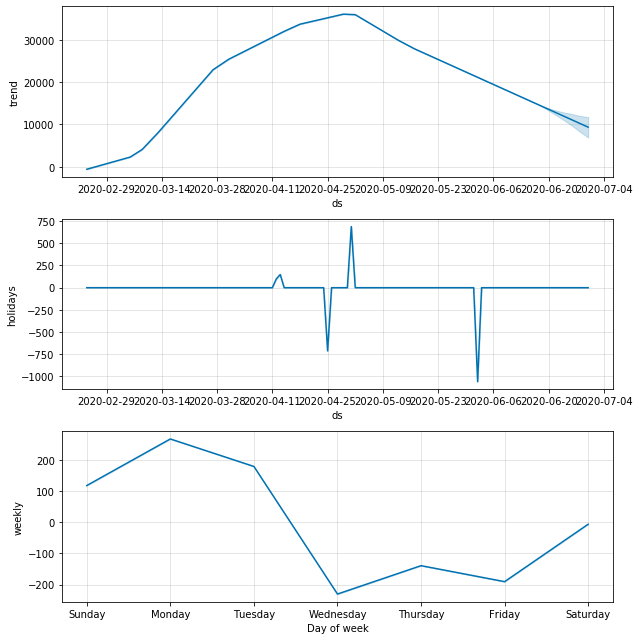

In [89]:
pm.plot_comp()

In [90]:
pm.print_metrics()

MAE: 445.890
MSE: 380196.095
RMSE: 616.600


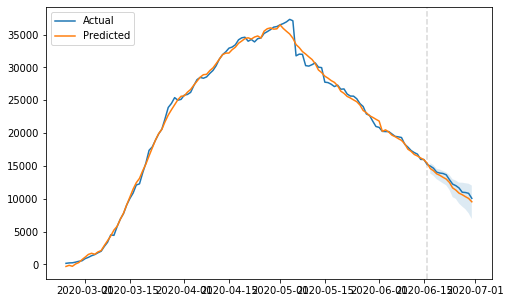

In [91]:
pm.plot()

No holidays

In [92]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data',
                  holidays=False)

In [93]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8ce8a4c0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5be0432d60>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

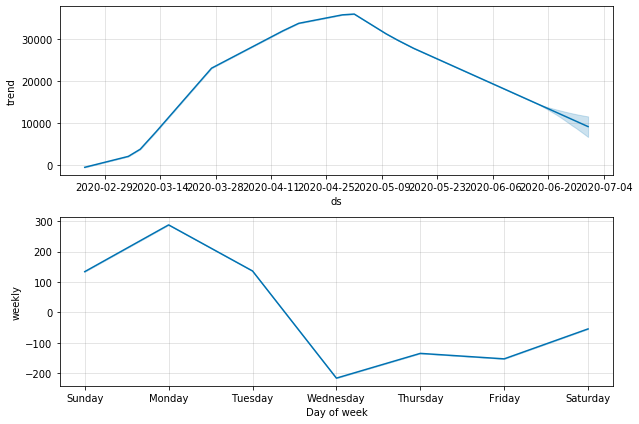

In [94]:
pm.plot_comp()

In [95]:
pm.print_metrics()

MAE: 452.710
MSE: 377373.687
RMSE: 614.307


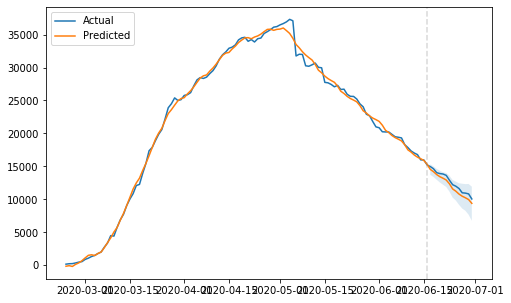

In [96]:
pm.plot()

### Total cases

In [7]:
province = "Lombardia"
compart = "totale_casi"
date = 'data'
group_column = 'denominazione_regione'

In [98]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data')

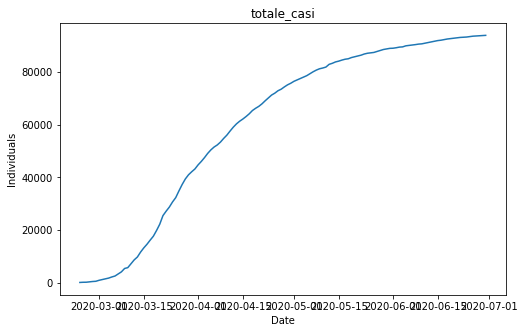

In [99]:
pm.plot_data()

In [100]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8ce8a8e0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8cc458e0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

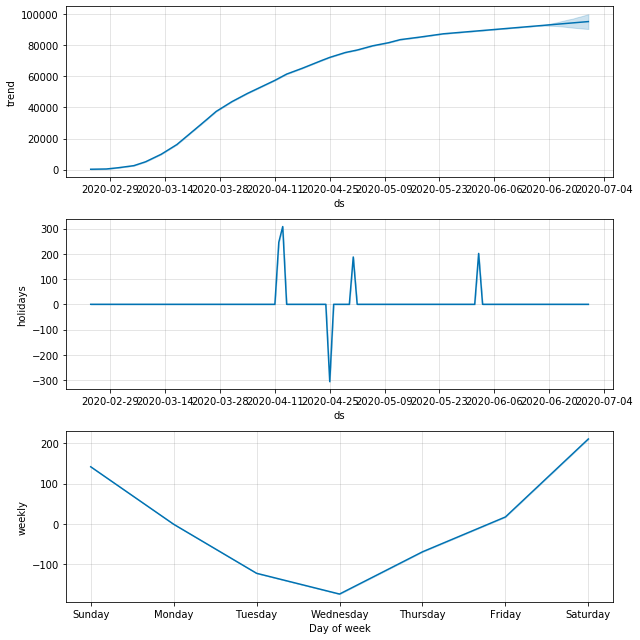

In [101]:
pm.plot_comp()

In [102]:
pm.print_metrics()

MAE: 168.861
MSE: 68384.522
RMSE: 261.504


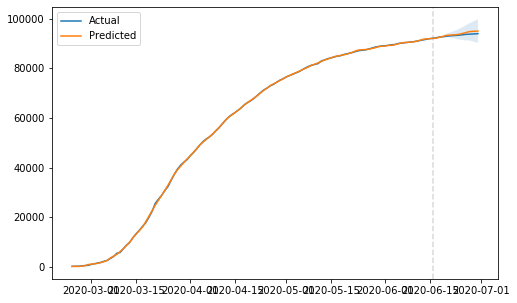

In [103]:
pm.plot()

### Total cases
Logistic growth

In [ ]:
province = "Lombardia"
compart = "totale_casi"
date = 'data'
group_column = 'denominazione_regione'

In [8]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data',
                  growth='logistic',
                  holidays=True)

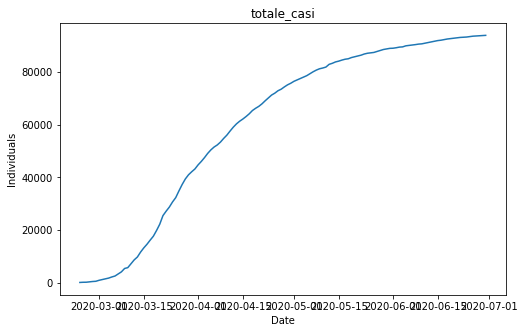

In [9]:
pm.plot_data()

In [10]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb639d5aca0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb63924d940>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

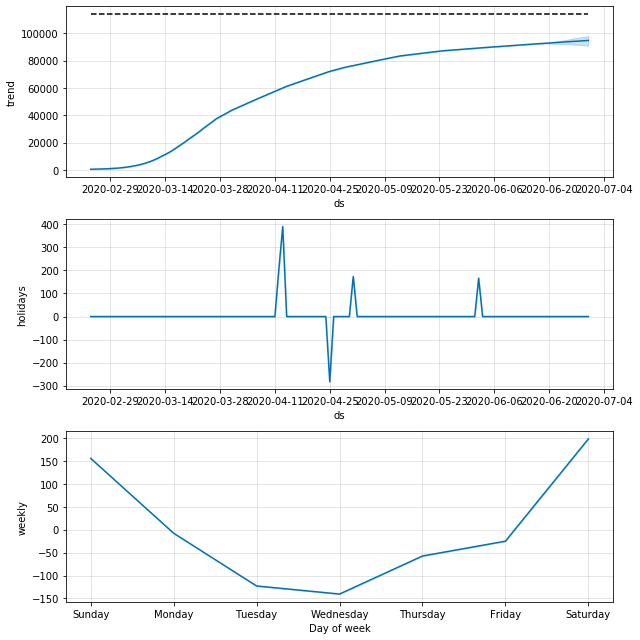

In [11]:
pm.plot_comp()

In [12]:
pm.print_metrics()

MAE: 183.144
MSE: 59699.977
RMSE: 244.336


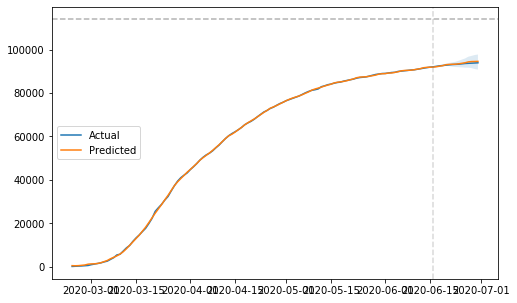

In [13]:
pm.plot()

## Provincial rolling

In [17]:
### Rolling 7 days

In [18]:
compart = 'Cases_Rolling_7'

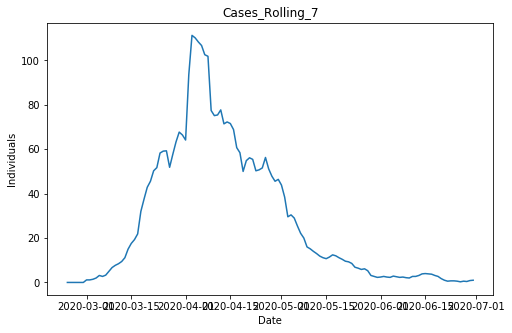

In [19]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

In [20]:
pm.plot_data()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f87758c3370>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8741020ee0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

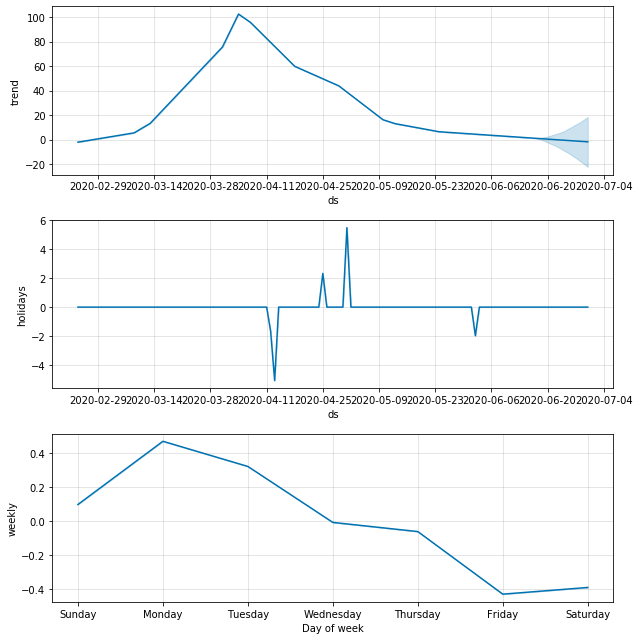

In [21]:
pm.fit_cv()

In [22]:
pm.plot_comp()

MAE: 2.654
MSE: 16.766
RMSE: 4.095


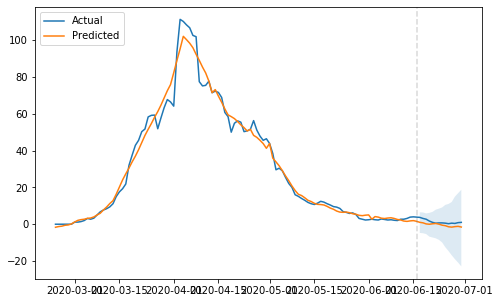

In [23]:
pm.print_metrics()

pm.plot()

In [6]:
Make the series stationary beforehand

In [10]:
province = "Firenze"
compart = "New_cases"
date = 'Date'
group_column = 'Province'
query = '20200701 > Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query(query)
tmp_df[compart] = tmp_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
tmp_df = tmp_df.set_index(date)
res = np.log(tmp_df[compart]) - np.log(tmp_df[compart]).shift(1)
res_fix = res.replace([np.inf, -np.inf], np.nan).interpolate(method='time')
res_fix = res_fix.fillna(0)

In [11]:
tmp_df = pd.DataFrame(res_fix).reset_index()
tmp_df['Province'] = province

,Date,New_cases,Province
0,2020-02-24,0.000000,Firenze
1,2020-02-25,0.000000,Firenze
2,2020-02-26,0.000000,Firenze
3,2020-02-27,0.072975,Firenze
4,2020-02-28,0.145950,Firenze
...,...,...,...
123,2020-06-26,-0.005970,Firenze
124,2020-06-27,-0.105844,Firenze
125,2020-06-28,-0.205717,Firenze
126,2020-06-29,-0.305591,Firenze


In [14]:
tmp_df

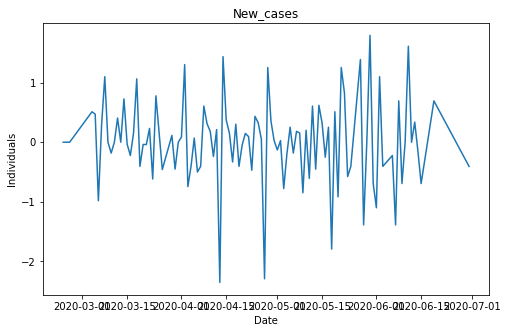

In [15]:
pm = ProphetModel(data=tmp_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

In [16]:
pm.plot_data()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f99171f4340>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9917248670>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet wit

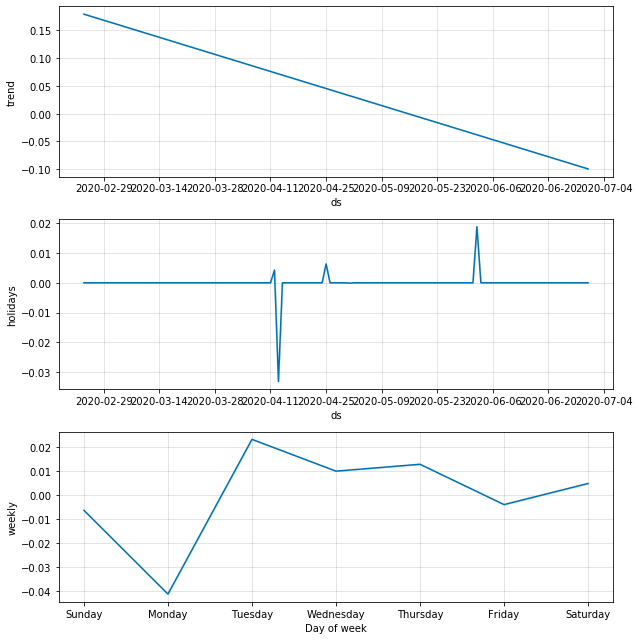

In [17]:
pm.fit_cv()

In [18]:
pm.plot_comp()

MAE: 0.459
MSE: 0.421
RMSE: 0.649


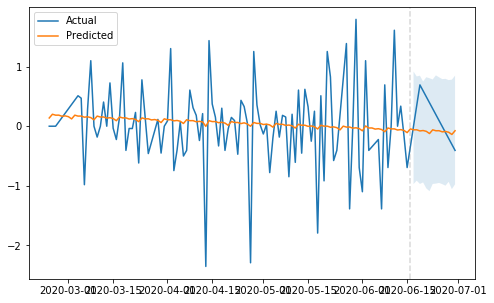

In [19]:
pm.print_metrics()

In [ ]:
pm.plot()